# การสร้างแผนที่โดยใช้ cartopy
นักภูมิศาสตร์ใช้แผนที่เป็นเครื่องมือในการวิเคราะห์ข้อมูล นักบรรยกาศและนักภูมิอากาศก็เช่นกัน metpy ใช้ cartopy ในการสร้างแผนที่
โค้ดนำมาจากลิงก์ https://www.youtube.com/watch?v=iPJjtU7OFSQ&list=PLQut5OXpV-0ir4IdllSt1iEZKTwFBa7kO&index=5
สามารถศึกษา cartopy จากลิ้งก์ https://scitools.org.uk/cartopy/docs/latest/gallery/index.html

* คำสั่งพื้นฐานในการใช้ jupyter
    * shift+enter รันคำสั่ง
    * shift+tab อ่านคำอธิบายฟังก์ชัน
    * กด b เพิ่มกล่องคำสั่งทางด้านล่างของกล่องปัจจุบัน
    * กด a เพิ่มกล่องคำสั่งทางด้านบนของกล่องปัจจุบัน
    * กด d d ลบกล่องคำสั่งปัจจุบัน
    
* พื้นฐานที่ควรมีก่อนการใช้งาน Metpy ควรมีทักษะดังนี้ตามลำดับการเรียนรู้ครับ
    * ภาษาไพธอน นิสิตสามารถเรียนรู้ด้วยตนเองจาก อ.ประเสริฐครับ ลิงก์นี้ https://www.youtube.com/watch?v=4MbmbzWAMsg&list=PLoTScYm9O0GH4YQs9t4tf2RIYolHt_YwW&index=13
    * แพคเกจ numpy เอาไว้จัดการข้อมูลอาเรย์หลายมิติ ทางด้านเราก็จะเป็นข้อมูลราสเตอร์ เช่น ข้อมูลภาพดาวเทียมที่มีหลายแบนด์ หรือข้อมูล renalysis หรือข้อมูล forecasting นิสิตสามารถเรียนรู้ด้วยตนเองจาก อ.ประเสริฐครับ ลิงก์นี้ https://www.youtube.com/watch?v=ts2L5mtMMi8&list=PLoTScYm9O0GFNEpzsCBEnkUwgAwOu_PWw
    * แพคเกจ matplotlib  เอาไว้พลอตภาพ https://www.youtube.com/watch?v=WOEOH8OV99k&list=PLoTScYm9O0GGRvUsTmO8MQUkIuM1thTCf
    * แพคเกจ pandas เอาไว้จัดการข้อมูล spread sheet เรียนรู้ด้วยตนเองจาก อ.ประเสริฐ จากลิงก์นี้ครับ https://www.youtube.com/watch?v=W661Zy939Q0&list=PLoTScYm9O0GFVfRk_MmZt0vQXNIi36LUz&index=20
    * แพคเกจ xarray เอาไว้เพื่อจัดการข้อมูลอารเย์หลายมิติ ลองเล่นดูครับ https://docs.xarray.dev/en/stable/gallery.html
    
    
* ยูทูปชาแนลและแหล่งเรียนรู้ออนไลน์ที่นิสิตควรศึกษาทางด้านบรรยากาศศาสตร์ ได้แก่
    * Dr.kevin Perry จากมหาวิทยาลัย Utah สอนเรื่องบรรยากาศศาสตร์ https://www.youtube.com/channel/UCktw_bKshmipG9QH_pgMkLw/videos
    * Prof.Dr.Ronald Smith จากมหาวิทยาลัยYale เรื่องThe Atmosphere, the Ocean, and Environmental Change https://oyc.yale.edu/geology-and-geophysics/gg-140
    *หนังสือฟรี อุตุนิยมวิทยาภาคปฏิบัติ สอนการคำนวณของ Prof.Roland Stull https://www.eoas.ubc.ca/books/Practical_Meteorology/

In [1]:
# ทำการ import ไลบราลี/แพคเกจ/โมดูล
import matplotlib.pyplot as plt
%matplotlib inline

import cartopy.crs as ccrs
import cartopy.feature as cfeat

# กด shift +enter

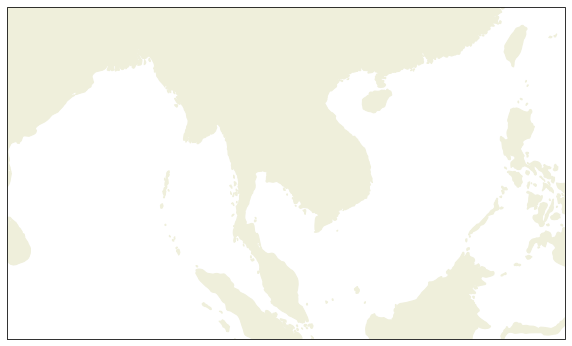

In [2]:
# เซตค่าแผนที่
# ลิสเส้นโครงแผนที่ https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html
# PlateCaree = geographic projection, lat/lon projection, or plane chart อ่าน https://en.wikipedia.org/wiki/Equirectangular_projection
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.add_feature(cfeat.LAND)

ax.set_extent([80, 125, 0, 25])


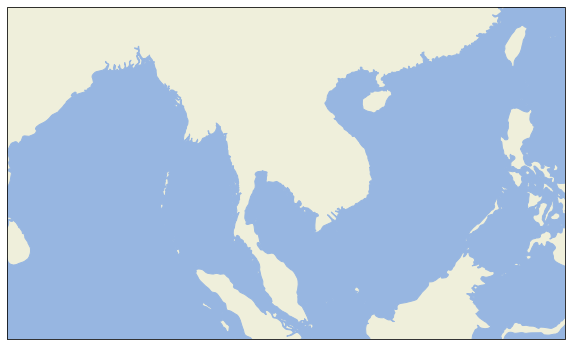

In [4]:
# เพิ่มชั้นข้อมูลพื้นทะเล
ax.add_feature(cfeat.OCEAN)
fig #เพิ่มชั้นแผนที่เข้าไปในแผนที่ก่อนหน้า

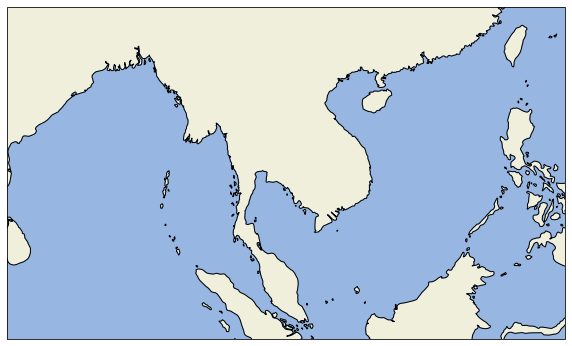

In [5]:
#เพิ่มเส้นแนวชายฝั่ง
ax.add_feature(cfeat.COASTLINE)
fig

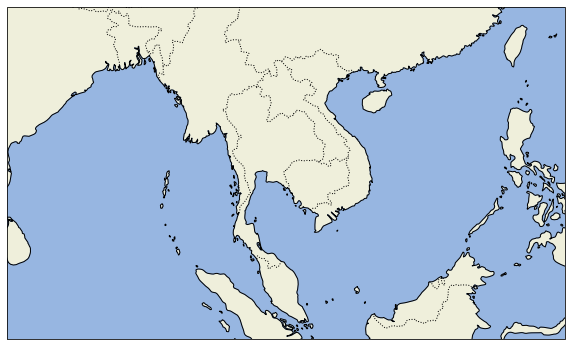

In [6]:
# เพิ่มขอบเขตประเทศ
ax.add_feature(cfeat.BORDERS, linestyle=':')
fig

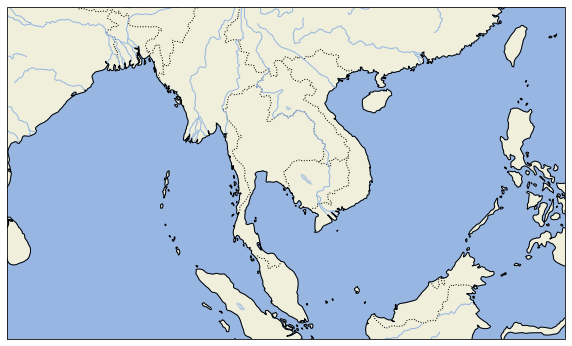

In [7]:
#เพิ่มทะสาบและแม่น้ำ
ax.add_feature(cfeat.LAKES, alpha=0.5)
ax.add_feature(cfeat.RIVERS)
fig

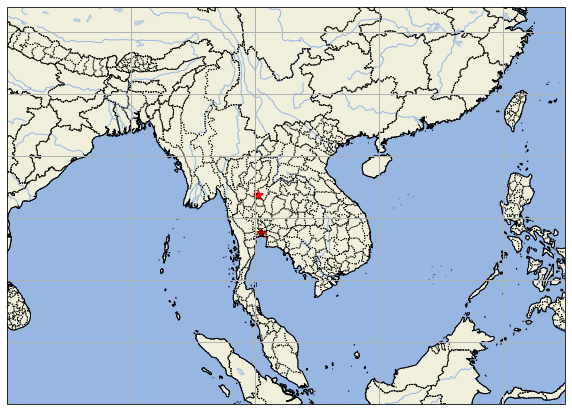

In [11]:
# ต่อไปจะเพิ่มชั้นแผนที่ให้ละเอียดมายิ่งขึ้น จากเวป https://www.naturalearthdata.com/features/
state_borders = cfeat.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lakes',
                                         scale='10m', facecolor='none')
ax.add_feature(state_borders, linestyle='dotted', edgecolor='black')

ax.gridlines() # เพิ่มกริด

fig

# สังเกตุว่าประเทศไทยไม่มีขอบเขตจังหวัดเนื่องจากไม่มีฐานข้อมูลใน cartopy หากต้องการแสดงให้ดาวน์โหลด shape มาแล้วเรียกใช้ ดังโค้ดนี้ https://stackoverflow.com/questions/25428512/draw-a-map-of-a-specific-country-with-cartopy

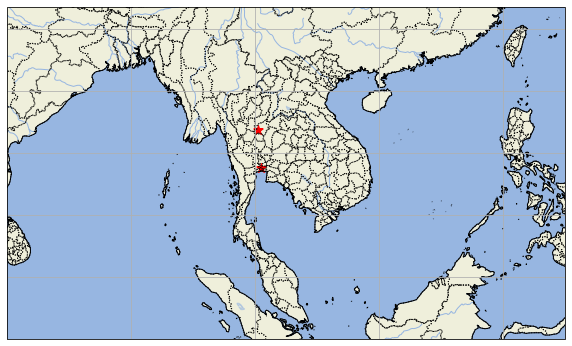

In [9]:
# สร้างจุดตำแหน่งกรุงเทพ
ax.scatter(100.5018, 13.7563, transform=ccrs.PlateCarree(), marker='*', s=100, c='r') # กทม
ax.scatter(100.2659, 16.8211,  transform=ccrs.PlateCarree(), marker='*', s=100, c='r') # พิษณุโลก
fig

## โค้ดรวมทั้งหมด

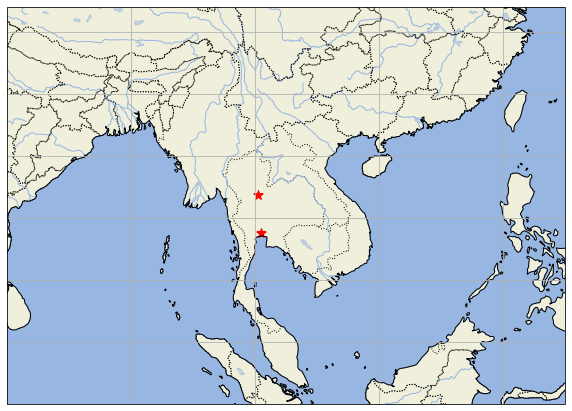

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

import cartopy.crs as ccrs
import cartopy.feature as cfeat

# ใส่รายละเอียดแผนที่เพิ่ม ให้พิมพ์ทีละบรรทัดแล้ว กด shift + enter
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

ax.add_feature(cfeat.LAND)

#ให้พิมพ์ทีละบรรทัดแล้ว กด shift และ enter
ax.add_feature(cfeat.OCEAN)
ax.add_feature(cfeat.COASTLINE)
ax.add_feature(cfeat.BORDERS, linestyle=':')
ax.add_feature(cfeat.LAKES, alpha=0.5)
ax.add_feature(cfeat.RIVERS)

state_borders = cfeat.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces_lakes',
                                         scale='10m', facecolor='none')
ax.add_feature(state_borders, linestyle='dotted', edgecolor='black')
ax.scatter(100.5018, 13.7563, transform=ccrs.PlateCarree(), marker='*', s=100, c='r') # กทม
ax.scatter(100.2659, 16.8211,  transform=ccrs.PlateCarree(), marker='*', s=100, c='r') # พิษณุโลก

ax.gridlines() # เพิ่มกริด
ax.set_extent([80, 125, 0, 30])

# ต่อไปจะเพิ่มชั้นแผนที่ให้ละเอียดมายิ่งขึ้น จากเวป https://www.naturalearthdata.com/features/

####  แบบฝึกหัด
* ศึกษาการพลอตแผนที่เพิ่มเติมจาก https://www.youtube.com/watch?v=bSdAqiVmrhA&list=PLQut5OXpV-0ir4IdllSt1iEZKTwFBa7kO&index=26
* ให้นิสิตพลอตแผนที่พื้นที่หรือภูมิภาคที่นิสิตสนใจ ลองเล่นกับข้อมูลอื่นๆ จาก nature earth หรือลองเล่นโค้ดจากเวปไซต์ของ cartopy หรือ อาจศึกษาหาโค้ดในเวปบล็อก หรือ ยูทูป ก็อาจทำได้
* ให้นิสิตลองคิดและลองหาวิธีว่าหากมี shapefile ที่ต้องการแสดงผล เช่น ขอบเขตอำเภอในประเทศไทย จะแสดงผลอย่างไร ลองใช้ google ช่วยในการหาคำตอบ